# Chapter 3: Linear Regression.

As a suggestion, you will need Nbextensions to run properly this Jupyter Notebook, particularly the $\LaTeX$ supporting extensions and the collapsible headings. I also suggest to use a table of contents since it is a particularly large Notebook. I hope it can be of help for any developer out there. I suggest to use in parallel the incredible book Introduction to Statistical Learning, from Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani, since this notebook is not self contained. 

## Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
import statsmodels.graphics.api as smg
sns.set(font_scale=1.5)

First, we need to know a little about the dataset provided by the book. 

In [2]:
adv = pd.read_csv('Data/Advertising.csv', usecols=[1, 2, 3, 4])
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Getting Scatterplots:

## Scatterplot for Every Predictor

We can perform a Scatterplot for every predictor variable. 

### Sales vs TV Advertise

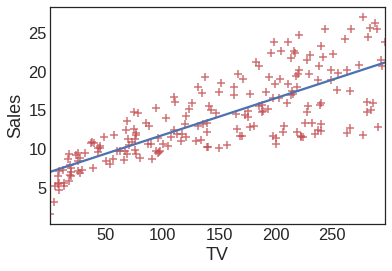

In [3]:
%matplotlib inline
plt.style.use('seaborn-white')
sns.regplot(adv.TV, adv.Sales, ci=None, scatter_kws={
            'color': 'r', 's': 50}, marker='+')
plt.show()

### Sales vs Radio Advertise

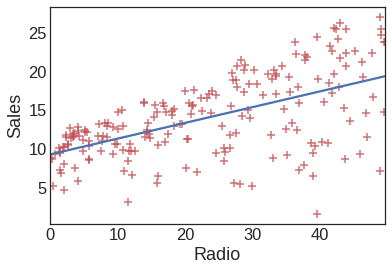

In [4]:
sns.regplot(adv.Radio, adv.Sales, ci=None, scatter_kws={
            'color': 'r', 's': 50}, marker='+')
plt.show()

### Sales vs Newspaper Ads

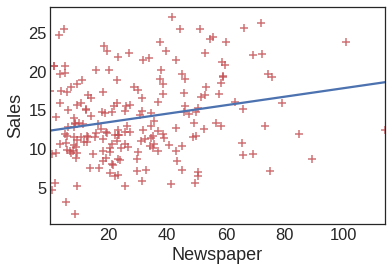

In [5]:
sns.regplot(adv.Newspaper, adv.Sales, ci=None,
            scatter_kws={'color': 'r', 's': 50}, marker='+')
plt.show()

### PairPlot:

We can also get a fast correlation plot to find how is the correlation between sales and Ads. 

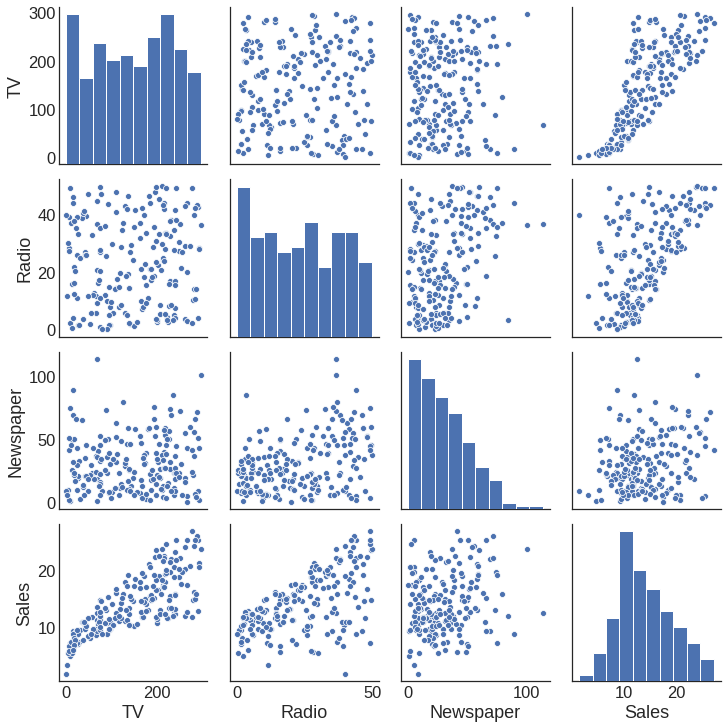

In [6]:
sns.pairplot(adv)
plt.show()

## Estimating Coefficients for the Linear Regression:

Importing Linear Regression Object from scikit-learn.linear_model.

### Using Scikit-Learn:

In [7]:
lr = LinearRegression()               # Calling Linear Regression Object.
Y = adv[['Sales']]                    # Only Sales.
X = adv[['TV']]
# X = adv.drop(columns=['Sales', 'Radio', 'Newspaper'])
# We can use the drop method to drop some columns of the dataframe.
lr.fit(X, Y)
B0 = lr.intercept_
B1 = lr.coef_
print('The Interception is: %.4f' % float(B0))
print('The Slope is: %.4f' % float(B1))
print('R-squared = %.4f' % lr.score(X, Y))

The Interception is: 7.0326
The Slope is: 0.0475
R-squared = 0.6119


### Using STATSMODEL to find important Statistical Information:

Using STATSMODEL we can get some information about the Linear Regression:

#### Sales vs. TV ads

In [8]:
X = adv.TV
X = sm.add_constant(X)
lm = sm.OLS(Y, X).fit()
lm.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


We can also try to predict the Sales using the remaining two variables: 

#### Sales vs Radio ads

In [9]:
X = adv.Radio
X = sm.add_constant(X)
lm = sm.OLS(Y, X).fit()
lm.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,9.3116,0.563,16.542,0.000,8.202,10.422
Radio,0.2025,0.020,9.921,0.000,0.162,0.243


#### Sales vs. Newspaper ads

In [10]:
X = adv.Newspaper
X = sm.add_constant(X)
lm = sm.OLS(Y, X).fit()
lm.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,12.3514,0.621,19.876,0.000,11.126,13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


### Find Correlation Coefficient:

We will find the Correlation Coefficient of the data using the following equation:

\begin{equation}
Cor(X,Y) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}}
\end{equation}

In [11]:
X = adv.TV.values
Y = adv.Sales.values
num = ((X-X.mean())*(Y-Y.mean())).sum()
den = np.sqrt(np.square((X-X.mean())).sum()) * \
    np.sqrt(np.square((Y-Y.mean())).sum())
cor = num/den
print('The Correlation Coefficient is: %.4f' % cor)

The Correlation Coefficient is: 0.7822


In simple linear regression $R^2 = (Cor(X,Y))^2$.

## Multiple Linear Regression:

In [12]:
X = adv[['TV', 'Radio', 'Newspaper']]
X = sm.add_constant(X)
Y = adv.Sales.values
lm = sm.OLS(Y, X).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           1.58e-96
Time:                        02:03:13   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

### Correlation Matrix:

In [13]:
adv.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Correlation in Multiple Linear Regression is:

\begin{equation}
R^2 = (Cor(Y,\hat{Y}))^2
\end{equation}

In [14]:
yhat = lm.predict(X)
A = np.corrcoef(Y, yhat)
Rsq = A[0][1]**2
print('The R-squared = %.4f' % Rsq)

The R-squared = 0.8972


## Credit Dataset:

Figure 3.6

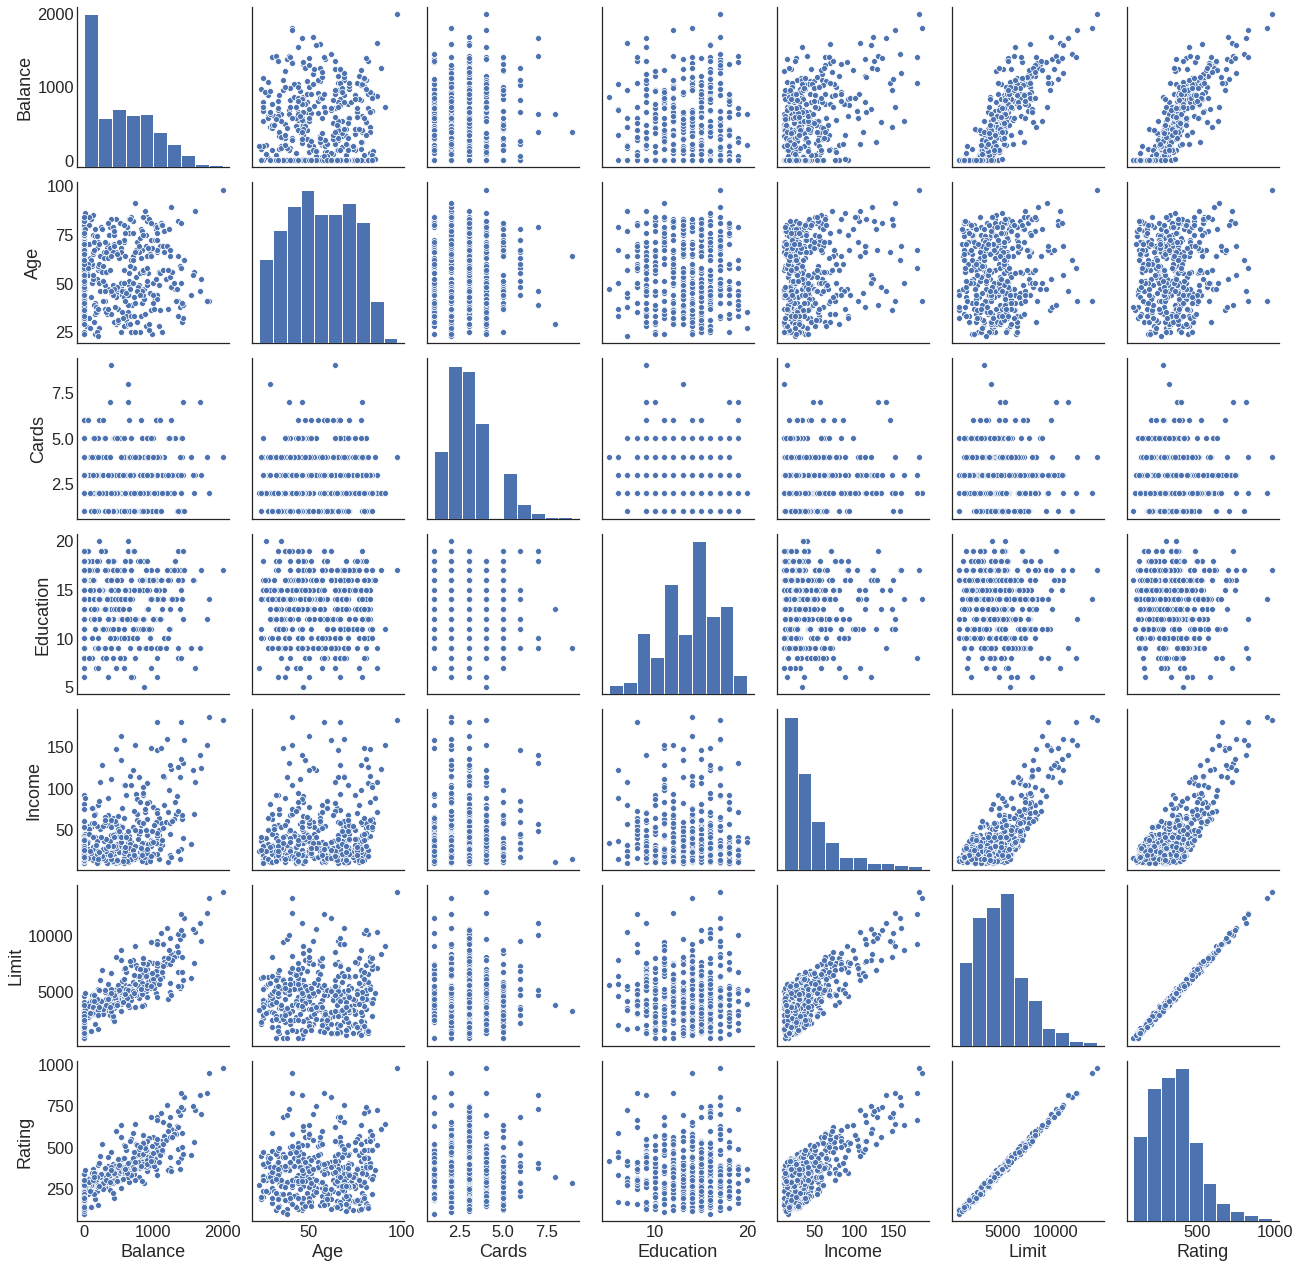

In [15]:
cre = pd.read_csv('Data/Credit.csv', usecols=list(range(1, 12)))
df = cre[['Balance', 'Age', 'Cards', 'Education',
          'Income', 'Limit', 'Rating']]  # Only quantitative!
sns.pairplot(df)
plt.show()

## Qualitative Predictors

In [16]:
dummy = pd.get_dummies(cre['Gender'])
cre.drop(columns=['Gender'])
cre = cre.merge(dummy['Female'], left_index=True, right_index=True)
cre

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Female
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560,0
396,13.364,3838,296,5,65,17,Male,No,No,African American,480,0
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138,1
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0,0


### Linear Model only for Females:

In [17]:
X = cre['Female']
Y = cre['Balance']
X = sm.add_constant(X)
lm = sm.OLS(Y, X).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Fri, 23 Oct 2020   Prob (F-statistic):              0.669
Time:                        02:03:23   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        509.8031     33.128     15.389      0.0

### Linear Models for Ethnicity

In [18]:
Eth_dummies = pd.get_dummies(cre['Ethnicity'])
cre = cre.merge(Eth_dummies[['Asian', 'Caucasian']],
                left_index=True, right_index=True)

In [19]:
X = cre[['Asian', 'Caucasian']]
X = sm.add_constant(X)
lm = sm.OLS(Y, X).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Fri, 23 Oct 2020   Prob (F-statistic):              0.957
Time:                        02:03:23   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        531.0000     46.319     11.464      0.0

## Extensions of the Linear Model

### Removing Additive Assumption:

In [20]:
InteractorTerm = adv.TV*adv.Radio        # Multiplying TV ads * Radio Ads
# Converting the Array into a DataFrame.
InteractorTerm = pd.DataFrame(InteractorTerm)
# Changing the Column Name.
InteractorTerm.rename(columns={0: 'TV*Radio'}, inplace=True)
# Merging in the adv DataFrame
adv_add = adv.merge(InteractorTerm[['TV*Radio']], left_index=True,
                    right_index=True)
adv_add

,TV,Radio,Newspaper,Sales,TV*Radio
0,230.1,37.8,69.2,22.1,8697.78
1,44.5,39.3,45.1,10.4,1748.85
2,17.2,45.9,69.3,9.3,789.48
3,151.5,41.3,58.5,18.5,6256.95
4,180.8,10.8,58.4,12.9,1952.64
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,141.34
196,94.2,4.9,8.1,9.7,461.58
197,177.0,9.3,6.4,12.8,1646.10
198,283.6,42.0,66.2,25.5,11911.20


In [21]:
X = adv_add[['TV', 'Radio', 'TV*Radio']]
X = sm.add_constant(X)
Y = adv_add[['Sales']]
lm = sm.OLS(Y, X).fit()
print(lm.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV*Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001


#### With Dummy Variables:

In [22]:
df = pd.get_dummies(cre['Student'])
df = df[['Yes']]
cre = cre.merge(df[['Yes']], left_index=True, right_index=True)

In [23]:
InteractorTerm = cre.Income*cre.Yes
InteractorTerm = pd.DataFrame(InteractorTerm)
InteractorTerm.rename(columns={0: 'Income*Student'}, inplace=True)

In [24]:
cre_add = cre.merge(
    InteractorTerm[['Income*Student']], left_index=True, right_index=True)

In [25]:
cre_add.rename(columns={'Yes': 'IsStudent'}, inplace=True)

In [26]:
X = cre_add[['Income', 'IsStudent', 'Income*Student']]
X = sm.add_constant(X)
Y = cre_add[['Balance']]
est1 = sm.OLS(Y, X).fit()
print(est1.summary().tables[1])
X = X[['const', 'Income', 'IsStudent']]
est2 = sm.OLS(Y, X).fit()
print(est2.summary().tables[1])

                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            200.6232     33.698      5.953      0.000     134.373     266.873
Income             6.2182      0.592     10.502      0.000       5.054       7.382
IsStudent        476.6758    104.351      4.568      0.000     271.524     681.827
Income*Student    -1.9992      1.731     -1.155      0.249      -5.403       1.404
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        211.1430     32.457      6.505      0.000     147.333     274.952
Income         5.9843      0.557     10.751      0.000       4.890       7.079
IsStudent    382.6705     65.311      5.859      0.000     254.272     511.069


In [27]:
regr1 = est2.params
regr2 = est1.params
regr2

const             200.623153
Income              6.218169
IsStudent         476.675843
Income*Student     -1.999151
dtype: float64

The Balance is:

\begin{equation}
balance = \beta_0 + \beta_1 \cdot income + Student
\end{equation}

Where student is 0 if the subject is non-student and 1 if it is a Student. 

#### Figure 3.8

This code was taken from GitHub, to learn about Matplotlib!

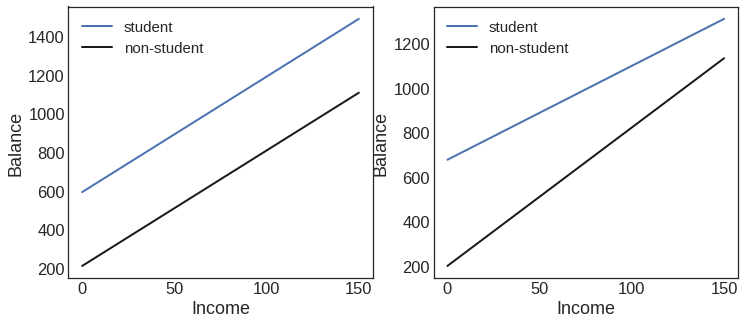

In [28]:
# Income (x-axis)
income = np.linspace(0, 150)

# Balance without interaction term (y-axis)
student = np.linspace(regr1['const']+regr1['IsStudent'],
                      regr1['const']+regr1['IsStudent']+150*regr1['Income'])
non_student = np.linspace(regr1['const'], regr1['const']+150*regr1['Income'])

# Balance with iteraction term (y-axis)
studentInteraction = np.linspace(regr2['const']+regr2['IsStudent'],
                                 regr2['const']+regr2['IsStudent'] +
                                 150*(regr2['Income']+regr2['Income*Student']))
non_studentInteraction = np.linspace(
    regr2['const'], regr2['const']+150*regr2['Income'])

# Create plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(income, student, 'b', income, non_student, 'k', linewidth=2)
ax2.plot(income, studentInteraction, 'b', income,
         non_studentInteraction, 'k', linewidth=2)

for ax in fig.axes:
    ax.legend(['student', 'non-student'], loc=2, fontsize=15)
    ax.set_xlabel('Income', fontsize=18)
    ax.set_ylabel('Balance', fontsize=18)

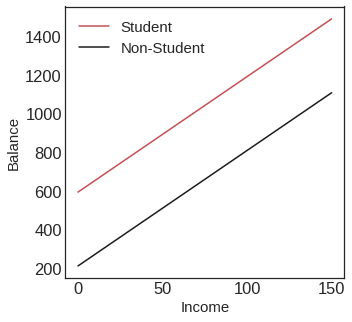

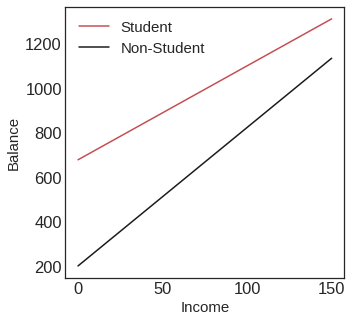

In [29]:
# Using the Pyplot Object! This is the same, I only used my previous knowledge about PyPlot.
plt.figure(figsize=(5, 5))
plt.plot(income, student, 'r', label='Student')
plt.plot(income, non_student, 'k', label='Non-Student')
plt.legend(fontsize=15)
plt.xlabel('Income', fontsize=15)
plt.ylabel('Balance', fontsize=15)
plt.show()

plt.figure(figsize=(5, 5))
plt.plot(income, studentInteraction, 'r', label='Student')
plt.plot(income, non_studentInteraction, 'k', label='Non-Student')
plt.legend(fontsize=15)
plt.xlabel('Income', fontsize=15)
plt.ylabel('Balance', fontsize=15)
plt.show()

## Loading Auto Dataset

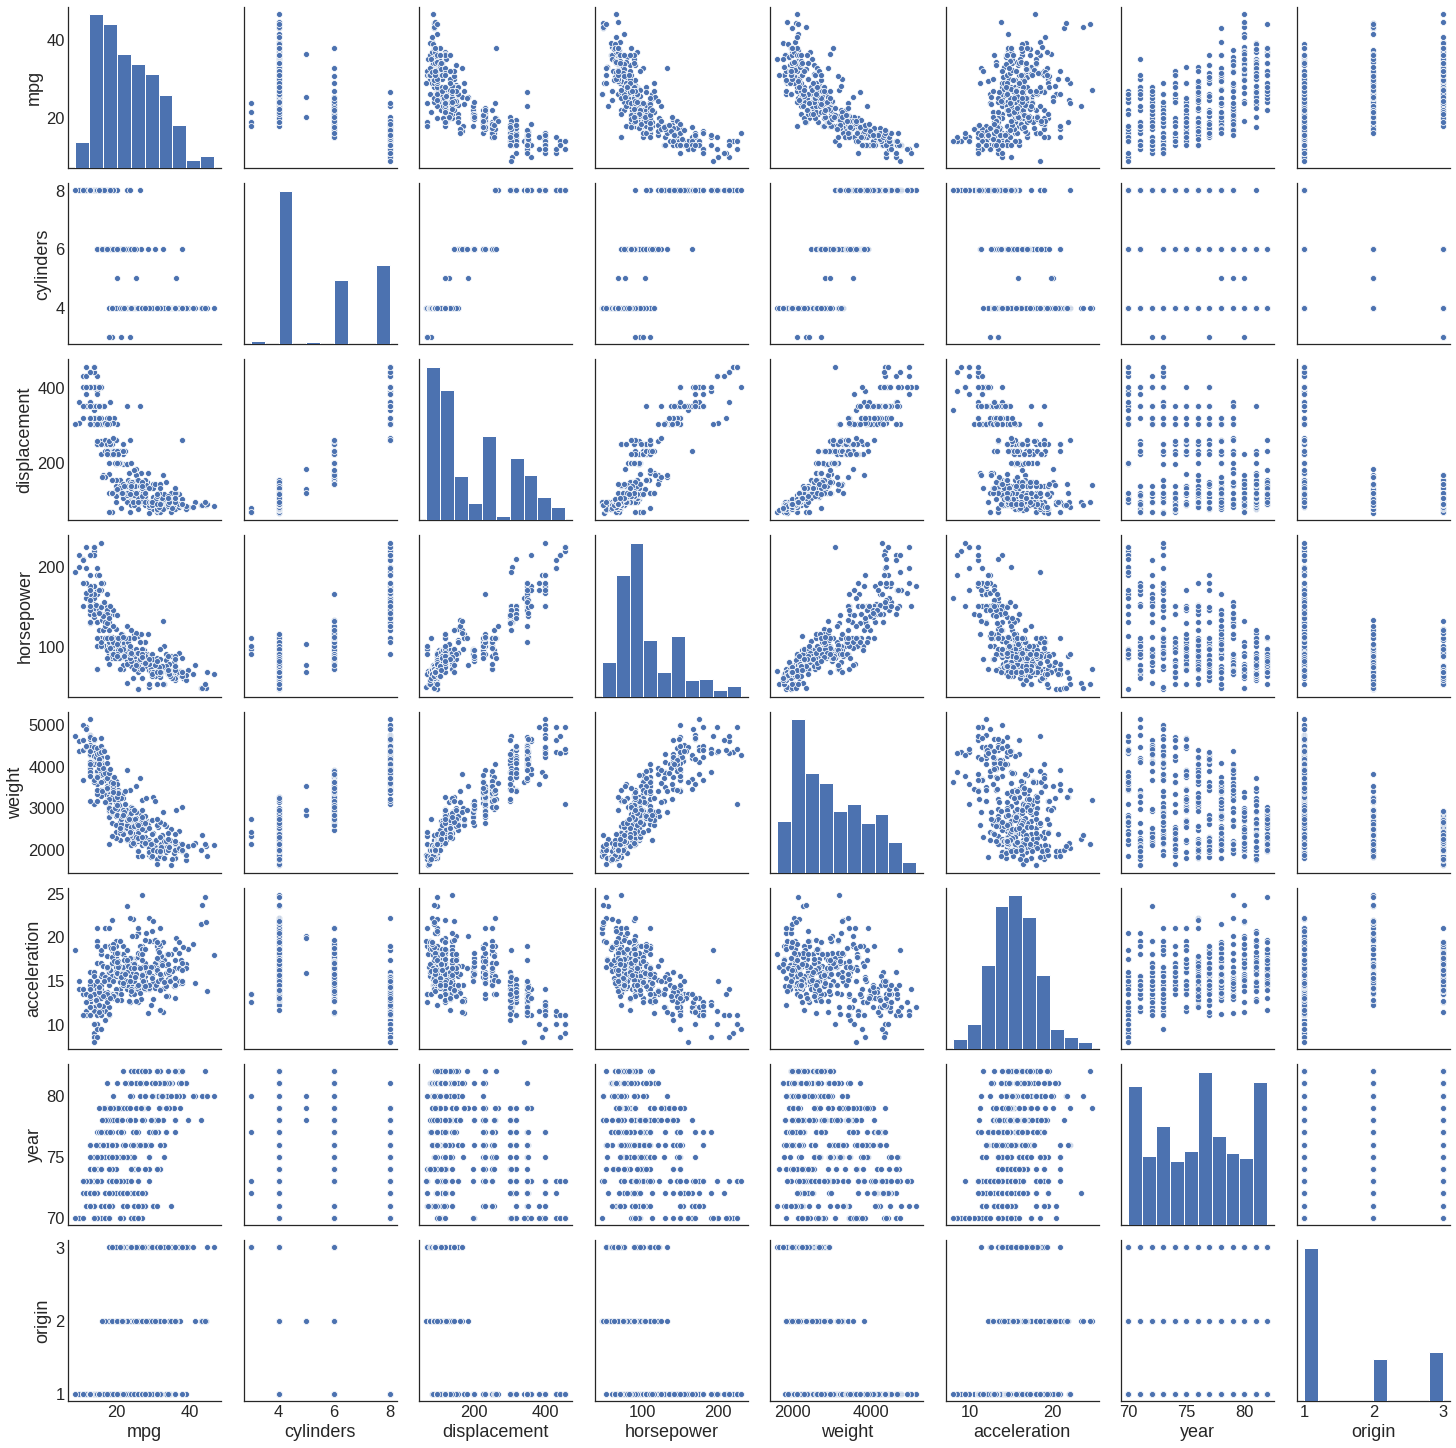

In [30]:
auto = pd.read_csv('Data/Auto.csv', na_values='?').dropna()
sns.pairplot(auto)
plt.show()

## Regression using Higher Order Polynomials with Seaborn.

Figure 3.8

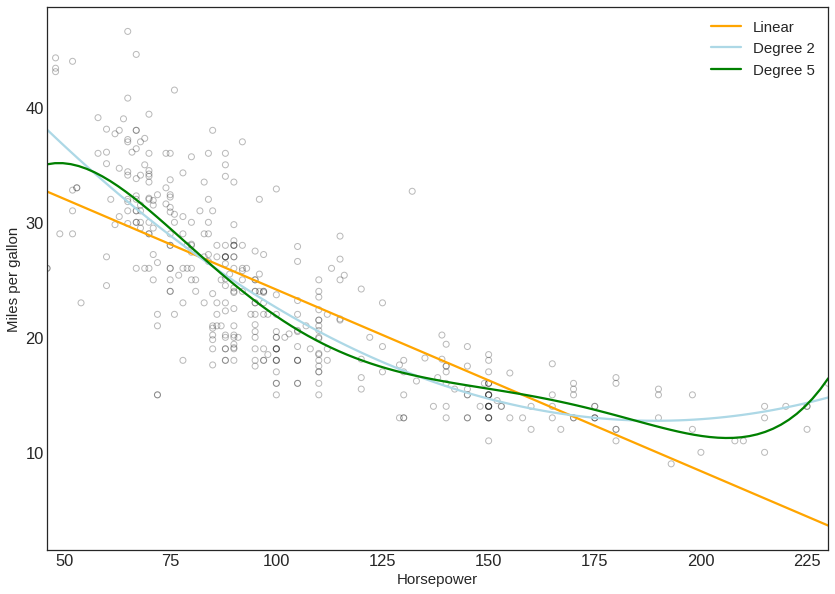

In [31]:
plt.figure(figsize=(14, 10))
plt.scatter(auto.horsepower, auto.mpg,
            facecolors='None', edgecolors='k', alpha=.3)
sns.regplot(auto.horsepower, auto.mpg, ci=None,
            label='Linear', scatter=False, color='orange')
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 2',
            order=2, scatter=False, color='lightblue')
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 5',
            order=5, scatter=False, color='green')
plt.legend(fontsize=15)
plt.xlabel('Horsepower', fontsize=15)
plt.ylabel('Miles per gallon', fontsize=15)
plt.show()

In [32]:
auto['horsepower2'] = auto.horsepower**2
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,22500.0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,19600.0


In [33]:
Y = auto['mpg']
X = auto[['horsepower', 'horsepower2']]
X = sm.add_constant(X)
lm = sm.OLS(Y, X).fit()
print(lm.summary().tables[1])

                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          56.9001      1.800     31.604      0.000      53.360      60.440
horsepower     -0.4662      0.031    -14.978      0.000      -0.527      -0.405
horsepower2     0.0012      0.000     10.080      0.000       0.001       0.001


## Residual Plots

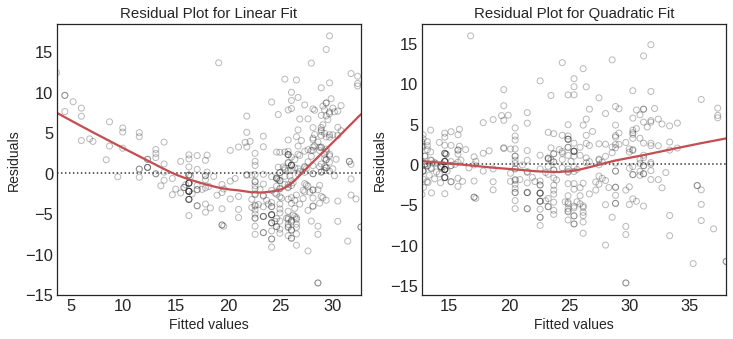

In [34]:
Xlin = X[['const', 'horsepower']]
Xsq = X
Y = auto['mpg']
# Fitting the Linear Regression Object for Matrices Xlin and Xsq.
lm = LinearRegression()
lsq = LinearRegression()
lm.fit(Xlin, Y)
lsq.fit(Xsq, Y)
# Getting predictions for Linear Regression:
yhatlin = lm.predict(Xlin)
reslin = Y-yhatlin
# Getting predictions for Quadratic Regression:
yhatsq = lsq.predict(Xsq)
ressq = Y-yhatsq
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.residplot(yhatlin, Y, lowess=True, ax=ax1, order=1, line_kws={
              'color': 'r'}, scatter_kws={'facecolors': 'None', 'edgecolors': 'k', 'alpha': .3})
ax1.set_title('Residual Plot for Linear Fit', fontsize=15)
sns.residplot(yhatsq, Y, lowess=True, ax=ax2, order=1, line_kws={
              'color': 'r'}, scatter_kws={'facecolors': 'None', 'edgecolors': 'k', 'alpha': .3})
ax2.set_title('Residual Plot for Quadratic Fit', fontsize=15)
for ax in fig.axes:
    ax.set_xlabel('Fitted values', fontsize=14)
    ax.set_ylabel('Residuals', fontsize=14)

Figure 3.9

## Figure 3.14

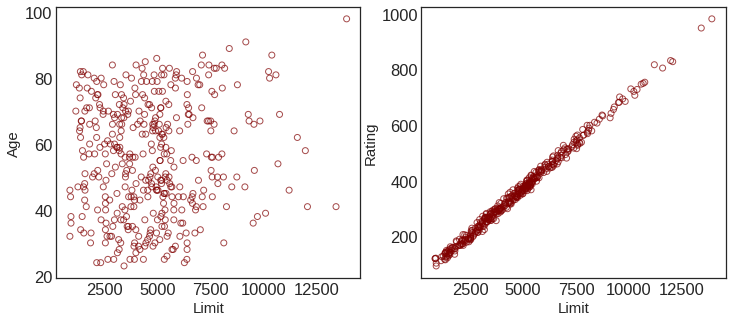

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(cre.Limit, cre.Age, facecolor='None',
            edgecolor='maroon', alpha=0.7)
ax1.set_ylabel('Age', fontsize=15)
ax2.scatter(cre.Limit, cre.Rating, facecolor='None',
            edgecolor='maroon', alpha=0.7)
ax2.set_ylabel('Rating', fontsize=15)
for ax in fig.axes:
    ax.set_xlabel('Limit', fontsize=15)

## Collinearity

In [36]:
X = cre[['Age', 'Limit']]
X = sm.add_constant(X)
Y = cre.Balance
lm = sm.OLS(Y, X).fit()
print(lm.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -173.4109     43.828     -3.957      0.000    -259.576     -87.246
Age           -2.2915      0.672     -3.407      0.001      -3.614      -0.969
Limit          0.1734      0.005     34.496      0.000       0.163       0.183


In [37]:
X = cre[['Rating', 'Limit']]
X = sm.add_constant(X)
Y = cre.Balance
lm = sm.OLS(Y, X).fit()
print(lm.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -377.5368     45.254     -8.343      0.000    -466.505    -288.569
Rating         2.2017      0.952      2.312      0.021       0.330       4.074
Limit          0.0245      0.064      0.384      0.701      -0.101       0.150


In [38]:
cre.drop(['Female', 'Asian', 'Caucasian', 'Yes'], axis=1, inplace=True)

### Correlation

Text(0.5, 1.0, 'Correlation Heatmap for The Credit Dataset')

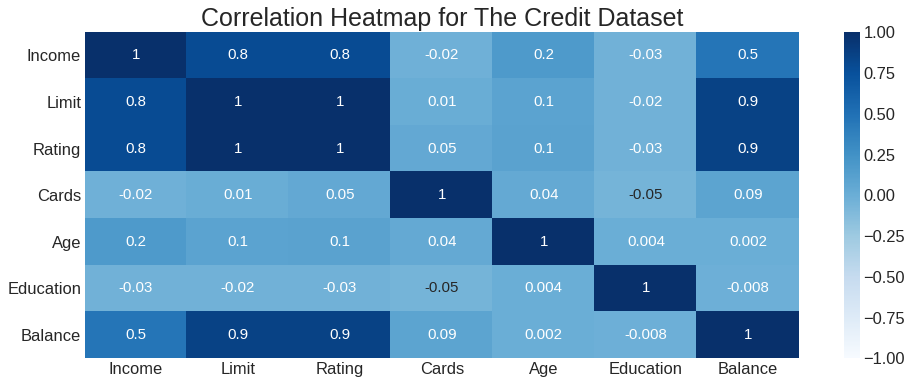

In [39]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(cre.corr(), vmin=-1, vmax=1, annot=True, annot_kws={
                      "fontsize": 15}, cmap='Blues', fmt='.1g', cbar_kws={'orientation': 'vertical'})
heatmap.set_title('Correlation Heatmap for The Credit Dataset',
                  fontdict={'fontsize': 25})

### Correlation for Only the Target Variable

Text(0.5, 1.0, 'Features Correlating with Balance')

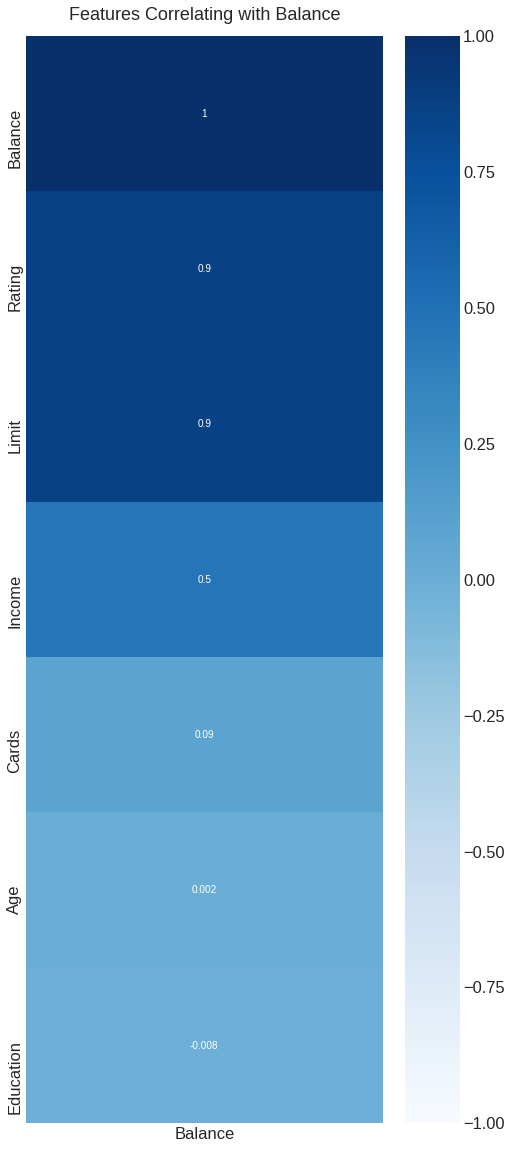

In [40]:
plt.figure(figsize=(8, 20))
heatmap = sns.heatmap(cre.corr()[['Balance']].sort_values(
    by='Balance', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Blues', fmt='.1g')
heatmap.set_title('Features Correlating with Balance',
                  fontdict={'fontsize': 18}, pad=16)

# Lab: Linear Regression

## Linear Regression

In [41]:
bos = pd.read_csv('Data/Boston.csv')
bos.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [42]:
X = bos.lstat
Y = bos.medv
X = sm.add_constant(X)
lm = sm.OLS(Y, X).fit()
print(lm.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874


In [43]:
RSE_boston = np.sqrt(lm.mse_resid)
Rsq_boston = lm.rsquared
print('The R-squared is: %.4f' % Rsq_boston)
print('The RSE is: %.4f' % RSE_boston)

The R-squared is: 0.5441
The RSE is: 6.2158


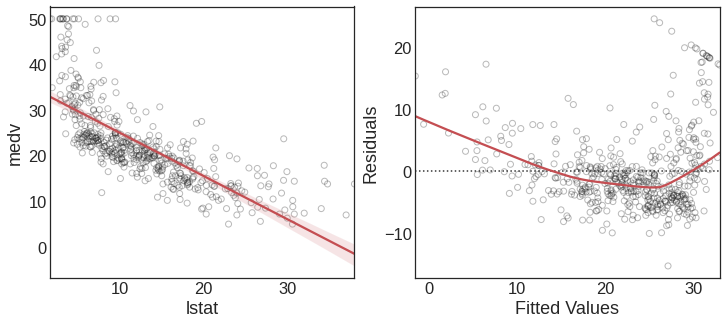

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.regplot(bos.lstat, bos.medv, ax=ax1, line_kws={'color': 'r'}, scatter_kws={
            'facecolors': 'None', 'edgecolors': 'k', 'alpha': .3})
sns.residplot(lm.fittedvalues, lm.resid, lowess=True, ax=ax2, order=1, line_kws={'color': 'r'}, scatter_kws={
              'facecolors': 'None', 'edgecolors': 'k', 'alpha': .3})
ax2.set_xlabel('Fitted Values')
ax2.set_ylabel('Residuals')
plt.show()

Note that there is a strong pattern in the residuals, indicating a non-linearity in the data. 

## Multiple Linear Regression

Text(0.5, 1.0, 'Features Correlating with medv')

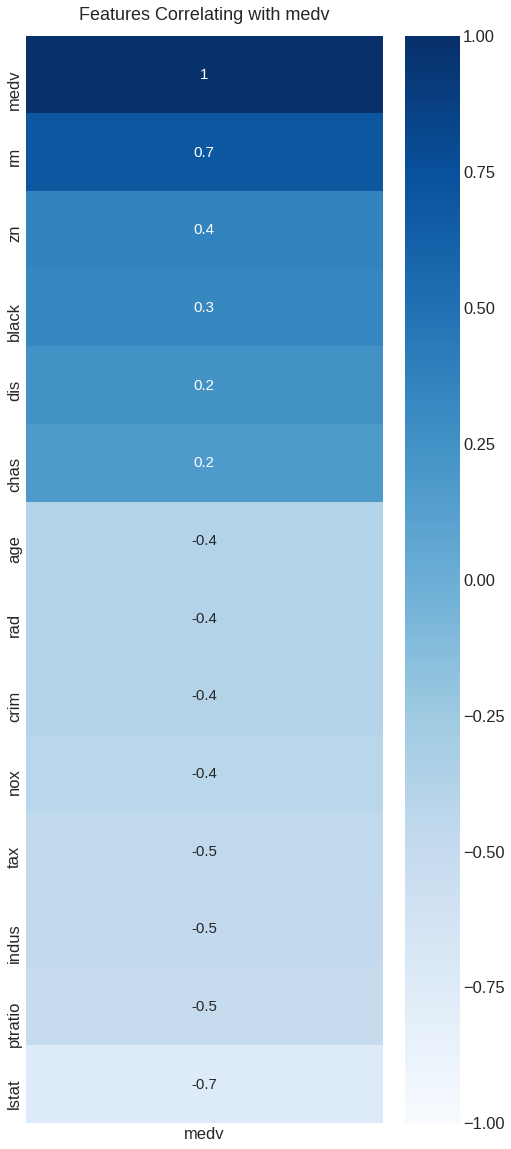

In [45]:
plt.figure(figsize=(8, 20))
heatmap = sns.heatmap(bos.corr()[['medv']].sort_values(by='medv', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='Blues', fmt='.1g', annot_kws={"fontsize": 15})
heatmap.set_title('Features Correlating with medv',
                  fontdict={'fontsize': 18}, pad=16)

### Using Only Lstat and Age

In [46]:
X = bos[['lstat', 'age']]
Y = bos.medv
X = sm.add_constant(X)
MultLR = sm.OLS(Y, X).fit()
print(MultLR.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           2.98e-88
Time:                        02:03:43   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.0

In [47]:
RSE_boston_multiple = np.sqrt(MultLR.mse_resid)
Rsq_boston_multiple = MultLR.rsquared
print('The R-squared is: %.4f' % Rsq_boston_multiple)
print('The RSE is: %.4f' % RSE_boston_multiple)

The R-squared is: 0.5513
The RSE is: 6.1731


In [48]:
MultLR.params

const    33.222761
lstat    -1.032069
age       0.034544
dtype: float64

### Using All Variables

In [49]:
X = bos.copy(deep=True)
X.drop('medv', axis=1, inplace=True)
X = sm.add_constant(X)
Y = bos.medv
MultLRfull = sm.OLS(Y, X).fit()
print(MultLRfull.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 23 Oct 2020   Prob (F-statistic):          6.72e-135
Time:                        02:03:43   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [50]:
RSE_boston_multiple = np.sqrt(MultLRfull.mse_resid)
Rsq_boston_multiple = MultLRfull.rsquared
print('The R-squared is: %.4f' % Rsq_boston_multiple)
print('The RSE is: %.4f' % RSE_boston_multiple)

The R-squared is: 0.7406
The RSE is: 4.7453


### All Variables but one

In [51]:
X.drop('age', axis=1, inplace=True)
MultLRfull = sm.OLS(Y, X).fit()
print(MultLRfull.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Fri, 23 Oct 2020   Prob (F-statistic):          6.08e-136
Time:                        02:03:43   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4369      5.080      7.172      0.0

In [52]:
RSE_boston_multiple = np.sqrt(MultLRfull.mse_resid)
Rsq_boston_multiple = MultLRfull.rsquared
print('The R-squared is: %.4f' % Rsq_boston_multiple)
print('The RSE is: %.4f' % RSE_boston_multiple)

The R-squared is: 0.7406
The RSE is: 4.7405


## Interaction Terms

In [53]:
X = bos.copy(deep=True)
X = X[['lstat', 'age']]
X['interaction'] = X.lstat*X.age
X = sm.add_constant(X)
X.drop('age', axis=1, inplace=True)
MultLRfull = sm.OLS(Y, X).fit()
print(MultLRfull.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     314.6
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           2.42e-89
Time:                        02:03:43   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3276.
Df Residuals:                     503   BIC:                             3289.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          36.0415      0.691     52.133      

In [54]:
RSE_boston_multiple = np.sqrt(MultLRfull.mse_resid)
Rsq_boston_multiple = MultLRfull.rsquared
print('The R-squared is: %.4f' % Rsq_boston_multiple)
print('The RSE is: %.4f' % RSE_boston_multiple)

The R-squared is: 0.5557
The RSE is: 6.1424


## Non-Linear Transformations of the Predictors

In [55]:
X = bos.copy(deep=True)
X = X[['lstat']]
X['lstat2'] = X.lstat**2
X = sm.add_constant(X)
MultLRfull = sm.OLS(Y, X).fit()
print(MultLRfull.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Fri, 23 Oct 2020   Prob (F-statistic):          1.56e-112
Time:                        02:03:43   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.8620      0.872     49.149      0.0

In [56]:
RSE_boston_multiple = np.sqrt(MultLRfull.mse_resid)
Rsq_boston_multiple = MultLRfull.rsquared
print('The R-squared is: %.4f' % Rsq_boston_multiple)
print('The RSE is: %.4f' % RSE_boston_multiple)

The R-squared is: 0.6407
The RSE is: 5.5237


In [57]:
X = bos.copy(deep=True)
X = X[['lstat']]
X['lstat2'] = X.lstat*X.lstat
X['lstat3'] = X.lstat**3
X['lstat4'] = X.lstat**4
X['lstat5'] = X.lstat**5
X = sm.add_constant(X)
MultLRfull = sm.OLS(Y, X).fit()
print(MultLRfull.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Fri, 23 Oct 2020   Prob (F-statistic):          8.73e-122
Time:                        02:03:43   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.6997      3.604     18.783      0.0

# Exercises

## Conceptual Exercises

* Describe the null hypothesis of the p-values given in Table 3.4 correspond. Explain what conclusions you can draw based on these p-values. Your explanation should be phrased in terms of $\texttt{sales, TV radio}$ and $\texttt{newspaper}$, rather than in terms of the coefficients of the linear model  

* Carefully explain the differences between the KNN classifier and the KNN regression methods.

### 3
Suppose we have a dataset with five predictors, $X_1=GPA$, $X_2 = IQ$, $X_3 = Gender$, $X_4=Interaction(GPA*IQ)$, and $X_5 = GPA*Gender$. The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get $\hat{\beta_0} = 50$, $\hat{\beta_1} = 20$, $\hat{\beta_2} = 0.07$, $\hat{\beta_3} = 35$, $\hat{\beta_4} = 0.01$, $\hat{\beta_5} = -10$

<b> WORKING SECTION </b>

## Applied Exercises

### Question 8:

This question involves the use of simple linear regression on $\texttt{Auto}$ dataset:

Comment: We first find the correlation heatmap for the Auto Dataset, to find get some idea about the relationships between the different features of the dataset.

In [58]:
auto = pd.read_csv('Data/Auto.csv', na_values='?').dropna()

a) Perform a Linear Regression with $\texttt{mpg}$ as the response and $\texttt{horsepower}$ as the predictor. Use the summary method to print the results. Comment on the output:

In [59]:
X = auto.horsepower    # Predictor
Y = auto.mpg           # Target
X = sm.add_constant(X)
ex8a = sm.OLS(Y, X).fit()
print(ex8a.summary())
ex8arse = np.sqrt(ex8a.mse_resid)
Rsq_ex8a = ex8a.rsquared
print('The R-squared is: %.4f' % Rsq_ex8a)
print('The RSE is: %.4f' % ex8arse)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           7.03e-81
Time:                        02:03:43   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

* i) There is a relationship between the predictor and the response. As you can see, the p-value is really low, so the probability of $H_0$ is virtually zero. Also, there is a high correlation between mpg and horsepower, as we can see from the R-squared. Note that:

\begin{equation}
Cor(horsepower, mpg) = 0.778 \rightarrow R^2 = 0.606
\end{equation}

Therefore, we can say that there is a relationship between horsepower and mpg. 

* ii) Relationship is strong, since the p-value is close to zero. 
* iii) The coefficient is negative. Hence, the relationship is negative. (The coefficient is the slope).
* iv) 

In [60]:
d = {'const': [1], 'horsepower': [89]}
df = pd.DataFrame(data=d)
ex8a.predict(df)

0    25.88768
dtype: float64

Finally, we need to get the Diagnostic plots for Simple Linear Regression:

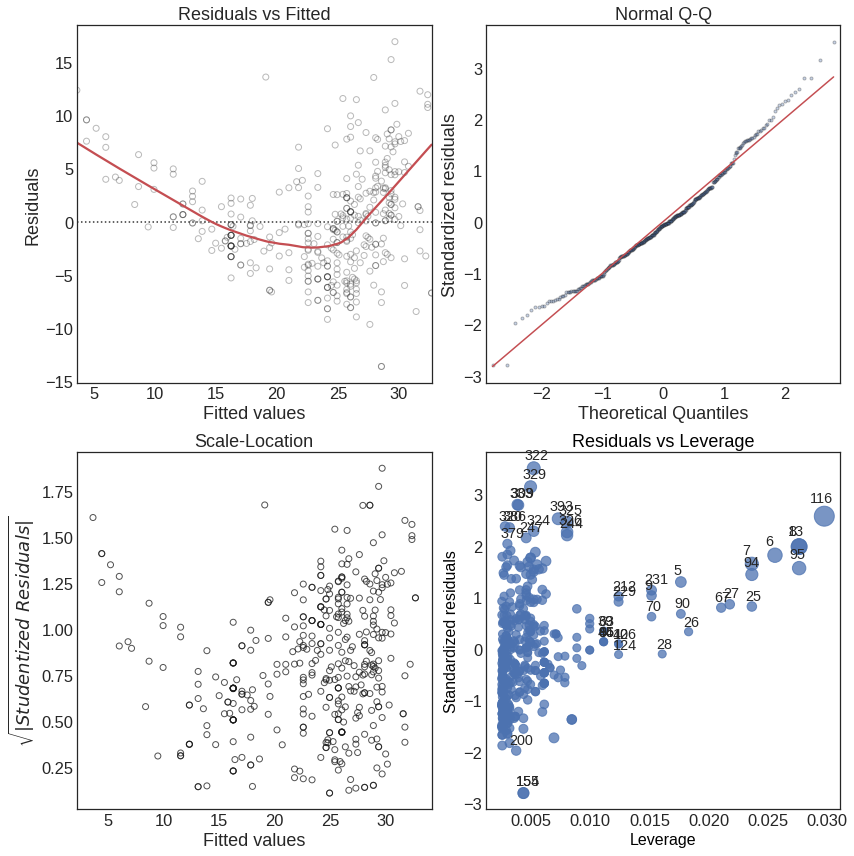

In [86]:
infl = ex8a.get_influence()
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# 1. Residuals. vs. fitted values
ax1 = plt.subplot(221)
sns.residplot(ex8a.fittedvalues, ex8a.resid, lowess=True, ax=ax1, order=1, line_kws={
              'color': 'r'}, scatter_kws={'facecolors': 'None', 'edgecolors': 'k', 'alpha': .3})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# 2. Normal Q-Q plot
ax2 = plt.subplot(222)
smg.qqplot(infl.resid_studentized_external, line='r', ax=ax2,
           alpha=0.3, marker='.', markerfacecolor=None, markeredgecolor='k')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized residuals')

# 3. Square-root absolute standardized residuals vs. fitted values
ax3 = plt.subplot(223)
plt.scatter(ex8a.fittedvalues, np.sqrt(np.absolute(
    infl.resid_studentized_external)), alpha=0.75, facecolors='none', edgecolors='k')
plt.title('Scale-Location')
plt.xlabel('Fitted values')
plt.ylabel(r'$\sqrt{|Studentized\ Residuals|}$')

# 4. Standardized residuals vs. leverage statistics
ax4 = plt.subplot(224)
smg.influence_plot(ex8a, size=20, ax=ax4,
                   markerfacecolor=None, markeredgecolor='k')
plt.xlabel('Leverage')
plt.ylabel('Standardized residuals')
plt.title('Residuals vs Leverage')

plt.tight_layout()
plt.show()

From the Residual plot, we can see that there is a strong evidence for a no linear correlation model from both variables. Note that there is a strong pattern between the Residuals and the Fitted Values. We can see also from the Q-Q plot, values far from the line. We can plot the Linear Regression in the following plot:

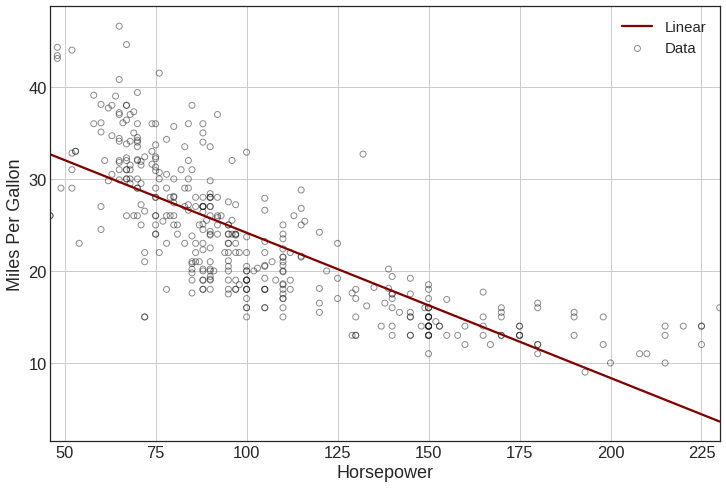

In [62]:
plt.figure(figsize=(12, 8))
sns.regplot(X.horsepower, Y, ci=None, label='Linear',
            scatter=False, color='maroon')
plt.scatter(X.horsepower, Y, facecolors='None',
            edgecolors='k', alpha=.5, label='Data')
plt.legend(fontsize=15)
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon')
plt.grid()
plt.show()

As a hypothesis, we can try to find an exponential regression for the presented data. It could be a better fit. Also, we can try to get a linear regression using a second degree polynomial. 

### Question 9

a) Produce a Scatterplot Matrix which includes all of the variables in the dataset.

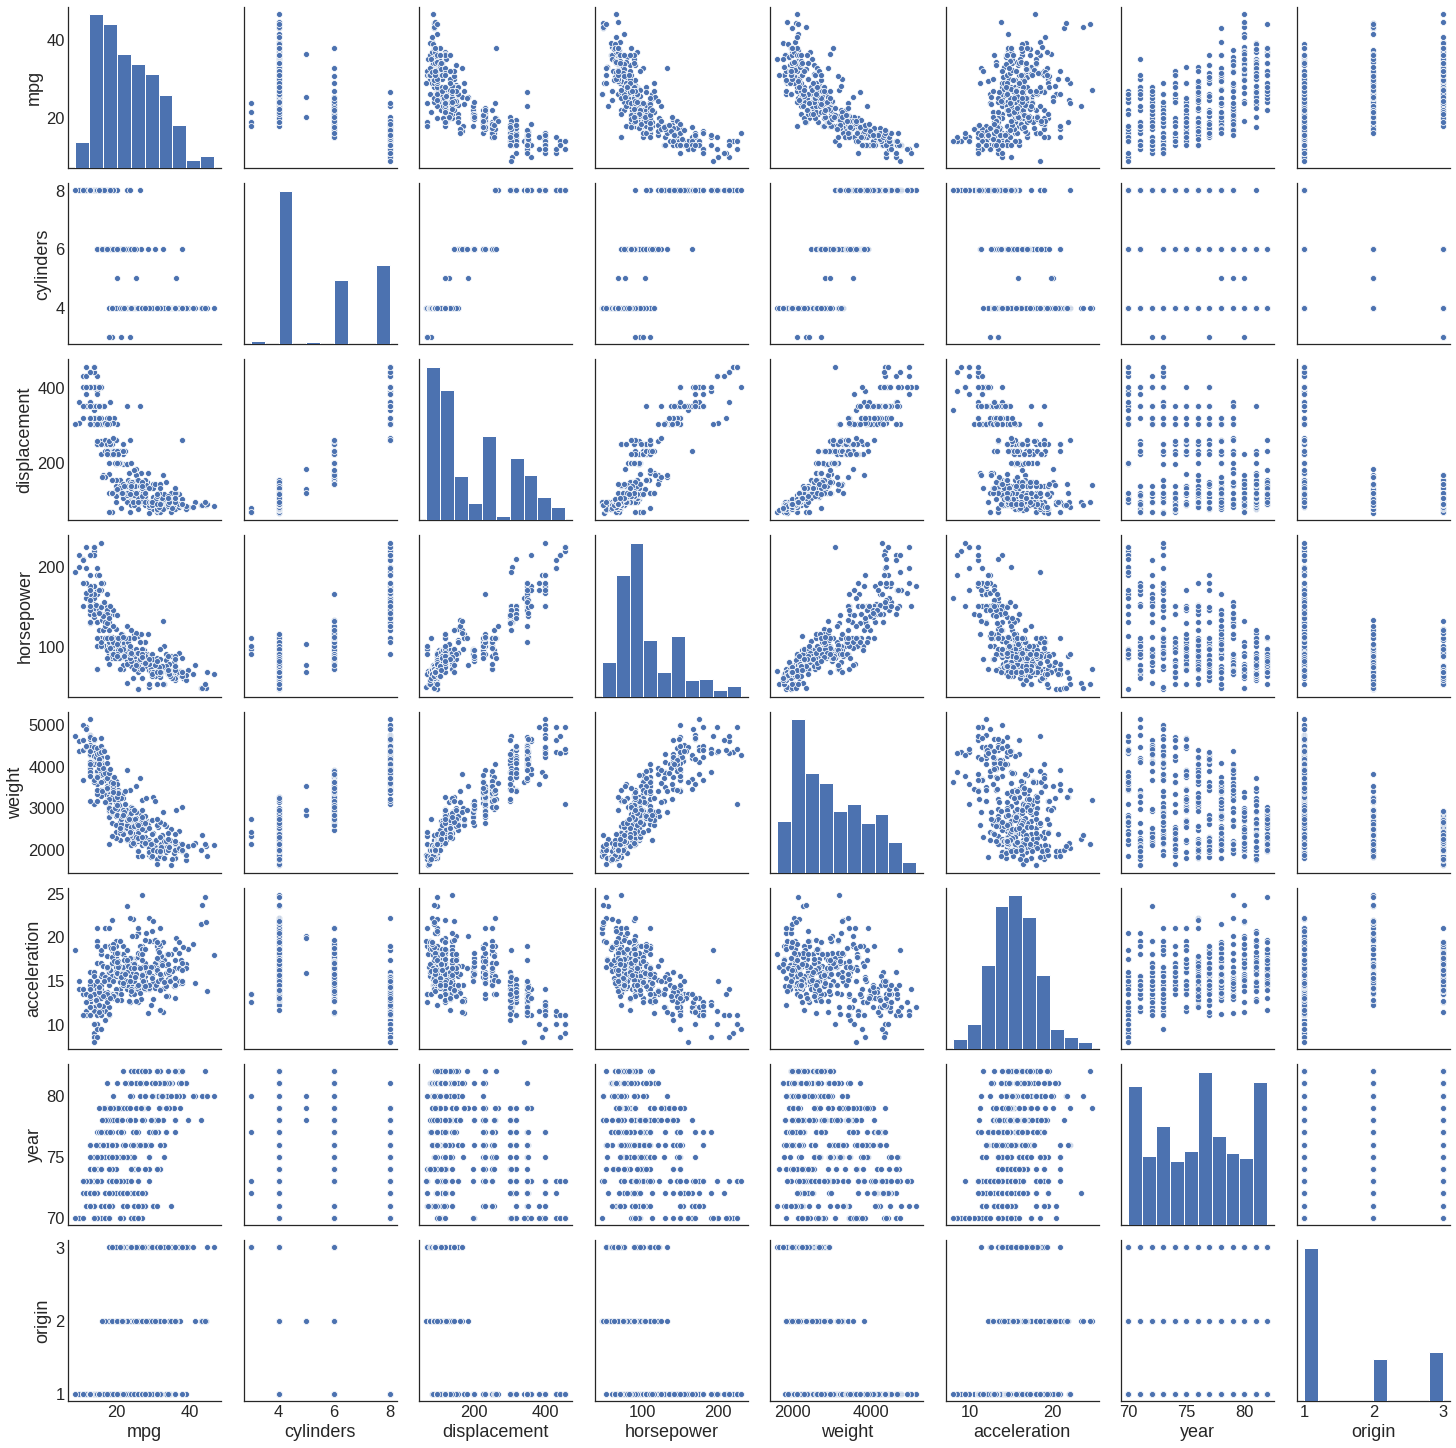

In [63]:
sns.pairplot(auto)
plt.show()

b) Compute the matrix of correlations between the variables.

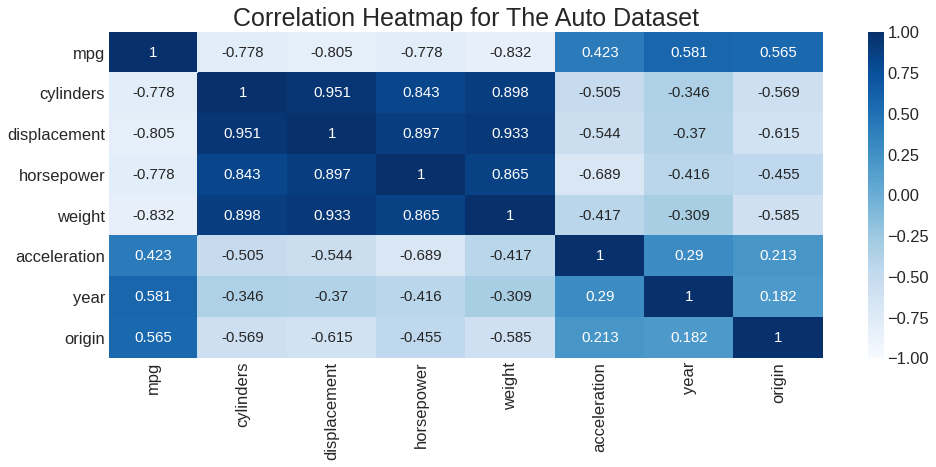

In [64]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(auto.corr(), vmin=-1, vmax=1, annot=True, annot_kws={
                      "fontsize": 15}, cmap='Blues', fmt='.3g', cbar_kws={'orientation': 'vertical'})
heatmap.set_title('Correlation Heatmap for The Auto Dataset',
                  fontdict={'fontsize': 25})
plt.show()

We can also plot the correlation between the variable mpg and all the other variables:

Text(0.5, 1.0, 'Features Correlating with mpg')

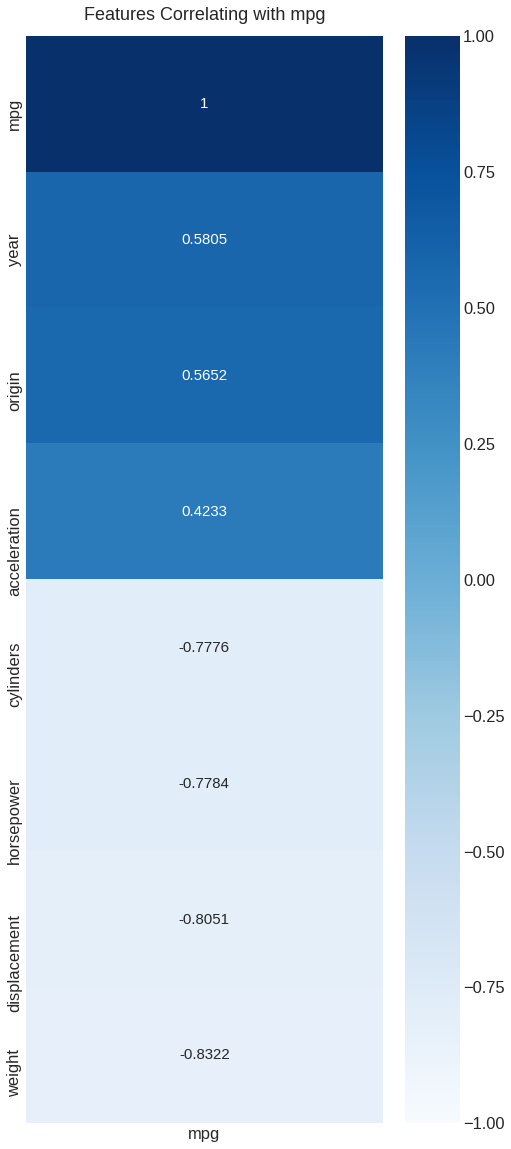

In [65]:
plt.figure(figsize=(8, 20))
heatmap = sns.heatmap(auto.corr()[['mpg']].sort_values(by='mpg', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='Blues', fmt='.4g', annot_kws={"fontsize": 15})
heatmap.set_title('Features Correlating with mpg',
                  fontdict={'fontsize': 18}, pad=16)

Except for acceleration, every single feature has a strong correlation with mpg. 

c) Perform a multiple linear regression with $\texttt{mpg}$ as a response and all the other variables as the predictors. Print the result. Comment the output.  

In [66]:
X = auto.copy(deep=True)
X.drop(columns=['name', 'mpg'], inplace=True)
X = sm.add_constant(X)
Y = auto.mpg
ex9c = sm.OLS(Y, X).fit()
print(ex9c.summary())
ex9crse = np.sqrt(ex9c.mse_resid)
Rsq_ex9c = ex9c.rsquared
print('\nThe R-squared is: %.4f' % Rsq_ex9c)
print('The RSE is: %.4f' % ex9crse)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 23 Oct 2020   Prob (F-statistic):          2.04e-139
Time:                        02:04:01   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

From the $R^2$ we can see that there is a strong relationship between the target and the predictors. We can see there is a statistically significant relationship with the target and the features displacement, weight, year, and origin. However, we can see that the worst relationship is with the acceleration feature. As we predicted with the correlation matrix. 

Finally, we can say that the 0.75 coefficient for the year variable, recent cars have a better miles per gallon performance. 

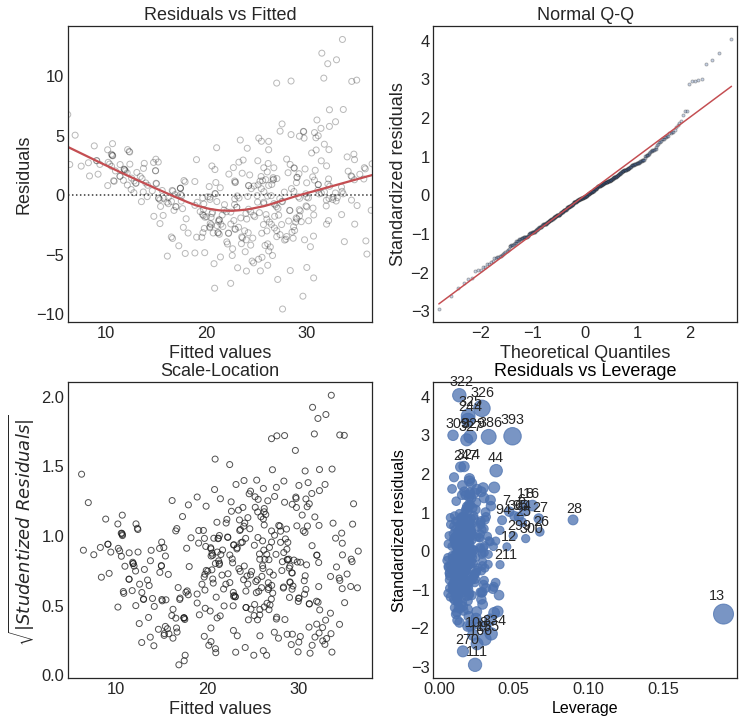

In [85]:
infl = ex9c.get_influence()
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# 1. Residuals. vs. fitted values
ax1 = plt.subplot(221)
sns.residplot(ex9c.fittedvalues, ex9c.resid, lowess=True, ax=ax1, order=1, line_kws={
              'color': 'r'}, scatter_kws={'facecolors': 'None', 'edgecolors': 'k', 'alpha': .3})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# 2. Normal Q-Q plot
ax2 = plt.subplot(222)
smg.qqplot(infl.resid_studentized_external, line='r', ax=ax2,
           alpha=0.3, marker='.', markerfacecolor=None, markeredgecolor='k')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized residuals')

# 3. Square-root absolute standardized residuals vs. fitted values
ax3 = plt.subplot(223)
plt.scatter(ex9c.fittedvalues, np.sqrt(np.absolute(
    infl.resid_studentized_external)), alpha=0.75, facecolors='none', edgecolors='k')
plt.title('Scale-Location')
plt.xlabel('Fitted values')
plt.ylabel(r'$\sqrt{|Studentized\ Residuals|}$')

# 4. Standardized residuals vs. leverage statistics
ax4 = plt.subplot(224)
smg.influence_plot(ex9c, size=20, ax=ax4)
plt.xlabel('Leverage')
plt.ylabel('Standardized residuals')
plt.title('Residuals vs Leverage')
plt.savefig('Diagnostic9c.png')

Note that we are getting a more reasonable result, with a Q-Q Plot coherent with the line. However, there is still a pattern in the data. We could be in presence of non-linearity and there are some outliers. 

e) Make regression models with interaction effects. Do any interactions appear to be statistically significant? 

Note that cylinders, displacement, horsepower and weight are apparently highly correlated. So, we are going to use only one of these features to our next model. We are going to make interactions with the other variables. Also, acceleration apparently is a problematic feature, so we are going to neglect it in the following analysis.

In [68]:
X = auto.copy(deep=True)
X.drop(columns=['name', 'mpg', 'cylinders', 'displacement',
                'horsepower', 'acceleration'], inplace=True)
X = sm.add_constant(X)
X['year:origin'] = X.year*X.origin
Y = auto.mpg
lr1 = sm.OLS(Y, X).fit()
print(lr1.summary().tables[1])
lr1rse = np.sqrt(lr1.mse_resid)
Rsq_lr1 = lr1.rsquared
print('\nThe R-squared is: %.4f' % Rsq_lr1)
print('The RSE is: %.4f' % lr1rse)

                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.7021      8.525      1.021      0.308      -8.059      25.463
weight         -0.0062      0.000    -24.016      0.000      -0.007      -0.006
year            0.4195      0.107      3.934      0.000       0.210       0.629
origin        -14.8860      4.539     -3.280      0.001     -23.809      -5.963
year:origin     0.2071      0.059      3.539      0.000       0.092       0.322

The R-squared is: 0.8232
The RSE is: 3.2990


In [69]:
X = auto.copy(deep=True)
X.drop(columns=['name', 'mpg', 'cylinders', 'displacement',
                'horsepower', 'acceleration'], inplace=True)
X = sm.add_constant(X)
X['weight:year'] = X.weight*X.year
Y = auto.mpg
lr1 = sm.OLS(Y, X).fit()
print(lr1.summary().tables[1])
lr1rse = np.sqrt(lr1.mse_resid)
Rsq_lr1 = lr1.rsquared
print('\nThe R-squared is: %.4f' % Rsq_lr1)
print('The RSE is: %.4f' % lr1rse)

                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -107.4412     12.761     -8.420      0.000    -132.530     -82.352
weight          0.0259      0.004      5.945      0.000       0.017       0.035
year            1.9607      0.170     11.510      0.000       1.626       2.296
origin          0.9176      0.245      3.742      0.000       0.435       1.400
weight:year    -0.0004   5.86e-05     -7.330      0.000      -0.001      -0.000

The R-squared is: 0.8397
The RSE is: 3.1410


In [70]:
X = auto.copy(deep=True)
X.drop(columns=['name', 'mpg', 'cylinders', 'displacement',
                'horsepower', 'acceleration'], inplace=True)
X = sm.add_constant(X)
X['weight:origin'] = X.weight*X.origin
Y = auto.mpg
lr1 = sm.OLS(Y, X).fit()
print(lr1.summary().tables[1])
lr1rse = np.sqrt(lr1.mse_resid)
Rsq_lr1 = lr1.rsquared
print('\nThe R-squared is: %.4f' % Rsq_lr1)
print('The RSE is: %.4f' % lr1rse)

                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -26.4366      4.303     -6.144      0.000     -34.897     -17.977
weight           -0.0034      0.001     -5.510      0.000      -0.005      -0.002
year              0.7834      0.047     16.511      0.000       0.690       0.877
origin            6.3636      1.157      5.501      0.000       4.089       8.638
weight:origin    -0.0022      0.000     -4.618      0.000      -0.003      -0.001

The R-squared is: 0.8270
The RSE is: 3.2632


All three interactions are statistically significant. Also, all three are giving a better fitting for the given data. However, we can use the three interactions and we will get a better fitting, but we could be getting worse p-values. In the following, we are going to use the three interactions simultaneously to find a better fitting:

In [71]:
X = auto.copy(deep=True)
X.drop(columns=['name', 'mpg', 'cylinders', 'displacement',
                'horsepower', 'acceleration'], inplace=True)
X = sm.add_constant(X)
X['weight:year'] = X.weight*X.year
X['weight:origin'] = X.weight*X.origin
X['year:origin'] = X.year*X.origin
Y = auto.mpg
lr1 = sm.OLS(Y, X).fit()
print(lr1.summary().tables[1])
lr1rse = np.sqrt(lr1.mse_resid)
Rsq_lr1 = lr1.rsquared
print('\nThe R-squared is: %.4f' % Rsq_lr1)
print('The RSE is: %.4f' % lr1rse)

                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -104.5541     20.681     -5.055      0.000    -145.217     -63.891
weight            0.0245      0.005      4.683      0.000       0.014       0.035
year              1.8637      0.275      6.784      0.000       1.324       2.404
origin            4.7370      5.116      0.926      0.355      -5.322      14.796
weight:year      -0.0004    7.1e-05     -5.437      0.000      -0.001      -0.000
weight:origin    -0.0015      0.000     -3.119      0.002      -0.002      -0.001
year:origin      -0.0042      0.066     -0.064      0.949      -0.133       0.125

The R-squared is: 0.8437
The RSE is: 3.1097


Note that the previous fitting is telling us that this is the best fitting at the time. However, the interaction year:origin is not statistically relevant, lets perform the regression without it. 

In [72]:
X = auto.copy(deep=True)
X.drop(columns=['name', 'mpg', 'cylinders', 'displacement',
                'horsepower', 'acceleration'], inplace=True)
X = sm.add_constant(X)
X['weight:year'] = X.weight*X.year
X['weight:origin'] = X.weight*X.origin
Y = auto.mpg
lr1 = sm.OLS(Y, X).fit()
print(lr1.summary().tables[1])
lr1rse = np.sqrt(lr1.mse_resid)
Rsq_lr1 = lr1.rsquared
print('\nThe R-squared is: %.4f' % Rsq_lr1)
print('The RSE is: %.4f' % lr1rse)

                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -103.5066     12.680     -8.163      0.000    -128.437     -78.577
weight            0.0243      0.004      5.583      0.000       0.016       0.033
year              1.8500      0.172     10.749      0.000       1.512       2.188
origin            4.4170      1.142      3.868      0.000       2.172       6.662
weight:year      -0.0004   5.98e-05     -6.422      0.000      -0.001      -0.000
weight:origin    -0.0015      0.000     -3.136      0.002      -0.002      -0.001

The R-squared is: 0.8437
The RSE is: 3.1057


This is the best regression at the time. 

f) Try a few different transformations of the variables, such as log(X), $\sqrt{X}$, $X^2$. Comment on your findings. 

In the following, I will use the previous regression (the best so far), and I will get different functions using the variable weight.

#### Using X^2

In [73]:
X = auto.copy(deep=True)
X.drop(columns=['name', 'mpg', 'cylinders', 'displacement',
                'horsepower', 'acceleration'], inplace=True)
X = sm.add_constant(X)
X['weight2'] = X.weight**2
Y = auto.mpg
lr1 = sm.OLS(Y, X).fit()
print(lr1.summary().tables[1])
lr1rse = np.sqrt(lr1.mse_resid)
Rsq_lr1 = lr1.rsquared
print('\nThe R-squared is: %.4f' % Rsq_lr1)
print('The RSE is: %.4f' % lr1rse)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4422      4.058     -0.109      0.913      -8.420       7.536
weight        -0.0204      0.002    -13.281      0.000      -0.023      -0.017
year           0.8247      0.044     18.675      0.000       0.738       0.912
origin         0.5026      0.243      2.064      0.040       0.024       0.981
weight2     2.213e-06   2.33e-07      9.487      0.000    1.75e-06    2.67e-06

The R-squared is: 0.8519
The RSE is: 3.0192


#### Using log(X)

In [74]:
X = auto.copy(deep=True)
X.drop(columns=['name', 'mpg', 'cylinders', 'displacement',
                'horsepower', 'acceleration'], inplace=True)
X = sm.add_constant(X)
X['log(weight)'] = np.log(X.weight)
Y = auto.mpg
lr1 = sm.OLS(Y, X).fit()
print(lr1.summary().tables[1])
lr1rse = np.sqrt(lr1.mse_resid)
Rsq_lr1 = lr1.rsquared
print('\nThe R-squared is: %.4f' % Rsq_lr1)
print('The RSE is: %.4f' % lr1rse)

                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         264.7008     30.656      8.635      0.000     204.428     324.973
weight          0.0072      0.001      5.003      0.000       0.004       0.010
year            0.8243      0.044     18.587      0.000       0.737       0.912
origin          0.5227      0.244      2.141      0.033       0.043       1.003
log(weight)   -40.9769      4.412     -9.288      0.000     -49.651     -32.303

The R-squared is: 0.8507
The RSE is: 3.0311


#### Using sqrt(X)

In [75]:
X = auto.copy(deep=True)
X.drop(columns=['name', 'mpg', 'cylinders', 'displacement',
                'horsepower', 'acceleration'], inplace=True)
X = sm.add_constant(X)
X['sqrt(weight)'] = np.sqrt(X.weight)
Y = auto.mpg
lr1 = sm.OLS(Y, X).fit()
print(lr1.summary().tables[1])
lr1rse = np.sqrt(lr1.mse_resid)
Rsq_lr1 = lr1.rsquared
print('\nThe R-squared is: %.4f' % Rsq_lr1)
print('The RSE is: %.4f' % lr1rse)

                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           61.2993      9.191      6.670      0.000      43.230      79.369
weight           0.0211      0.003      7.290      0.000       0.015       0.027
year             0.8250      0.044     18.639      0.000       0.738       0.912
origin           0.5123      0.244      2.101      0.036       0.033       0.992
sqrt(weight)    -3.0386      0.324     -9.390      0.000      -3.675      -2.402

The R-squared is: 0.8513
The RSE is: 3.0250


From those three models, the best so far is the $X^2$ model. Therefore, we will try to use the model using the interaction terms and the squared term.

In [76]:
X = auto.copy(deep=True)
X.drop(columns=['name', 'mpg', 'cylinders', 'displacement',
                'horsepower', 'acceleration'], inplace=True)
X = sm.add_constant(X)
X['weight:year'] = X.weight*X.year
X['weight2'] = X.weight**2
Y = auto.mpg
lr1 = sm.OLS(Y, X).fit()
print(lr1.summary().tables[1])
lr1rse = np.sqrt(lr1.mse_resid)
Rsq_lr1 = lr1.rsquared
print('\nThe R-squared is: %.4f' % Rsq_lr1)
print('The RSE is: %.4f' % lr1rse)

                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -55.7264     14.076     -3.959      0.000     -83.402     -28.051
weight          0.0009      0.005      0.171      0.865      -0.010       0.012
year            1.5095      0.173      8.738      0.000       1.170       1.849
origin          0.4944      0.239      2.071      0.039       0.025       0.964
weight:year    -0.0002   6.08e-05     -4.094      0.000      -0.000      -0.000
weight2       1.78e-06   2.52e-07      7.065      0.000    1.28e-06    2.27e-06

The R-squared is: 0.8581
The RSE is: 2.9595


The best prediction model found so far is with one interaction and the cuadratic term for weight. We could find another models, and they are maybe better predicting the mpg with this dataset. So this needs further research. 

## Question 10

This question should be answered using the Carseats dataset. 


In [77]:
carseats = pd.read_csv('Data/Carseats.csv', na_values='?').dropna()
carseats.drop(columns='Unnamed: 0', inplace=True)

a) Fit a multiple regression model to predict $\texttt{Sales}$ using $\texttt{Price}$, $\texttt{Urban}$ and $\texttt{US}$.    

Note that Urban and US are \textit{categorical} variables. So, we need to set for both Yes = 1 and No = 0, using dummy variables. 

In [78]:
X = carseats.copy(deep=True)
dummyUS = pd.get_dummies(X.US)
dummyUS.drop(columns='No', inplace=True)
dummyUrban = pd.get_dummies(X.Urban)
dummyUrban.drop(columns='No', inplace=True)

Now, we have the categorical variables for US and Urban, however, we need to change the names of the column on each dataframe, since both columns are named 'Yes'. 

In [79]:
dummyUS.rename(columns={'Yes': 'isUS'}, inplace=True)
dummyUrban.rename(columns={'Yes': 'isUrban'}, inplace=True)

We need now to concatenate the three dataframes. The three predictors are the Price, the condition of US and the condition of Urban, converted from categorical to numerical variables. We check the construction of the predictors with the method head.

In [80]:
X = carseats.copy(deep=True)
Y = X[['Sales']]
X = X[['Price']]
X = pd.concat([X, dummyUS, dummyUrban], axis=1)
X = sm.add_constant(X)
X.head(5)

,const,Price,isUS,isUrban
0,1.0,120,1,1
1,1.0,83,1,1
2,1.0,80,1,1
3,1.0,97,1,1
4,1.0,128,0,1


Finally, we construct the Linear Regression using statsmodels. 

In [81]:
ex10a = sm.OLS(Y, X).fit()
print(ex10a.summary())
ex10arse = np.sqrt(ex10a.mse_resid)
Rsq_ex10a = ex10a.rsquared
print('\nThe R-squared is: %.4f' % Rsq_ex10a)
print('The RSE is: %.4f' % ex10arse)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           2.39e-23
Time:                        02:04:03   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

This is a pretty bad model to predict the Sales. The R-squared is significantly low, and the isUrban variable is statistically insignificant. 

b) Provide an interpretation for each coefficient in the model. 

Price -> Sales drop by 0.0545 for each dollar increase. in price. 
isUS -> Sales increases by 1.2006 if it is an US location.
isUrban -> Sales drop by -0.0219 if it is an Urban location. (This is probably not true, since the real coefficient might be 0.)

c) Write out the model in equation form:

\begin{equation}
Sales = 13.0435 -0.0545 \cdot Price + 1.2006 \cdot isUS - 0.0219 \cdot isUrban
\end{equation}

Where isUS and isUrban are categorical variables and can be 1 or 0. 

d) For which of the predictors can you reject the null hypothesis $H_0: \beta_j = 0$? 

For isUS and Price, note that the p-value of isUrban is close to 1. 

e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [82]:
X = carseats.copy(deep=True)
Y = X[['Sales']]
X = X[['Price']]
X = pd.concat([X, dummyUS], axis=1)
X = sm.add_constant(X)
ex10e = sm.OLS(Y, X).fit()
print(ex10e.summary())
ex10erse = np.sqrt(ex10e.mse_resid)
Rsq_ex10e = ex10e.rsquared
print('\nThe R-squared is: %.4f' % Rsq_ex10e)
print('The RSE is: %.4f' % ex10erse)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           2.66e-24
Time:                        02:04:03   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.0

The model is not particularly better since the previous model is almost neglecting the isUrban variable. And this model is completely neglecting that variable. However, this is a simpler model and this is valuable. 

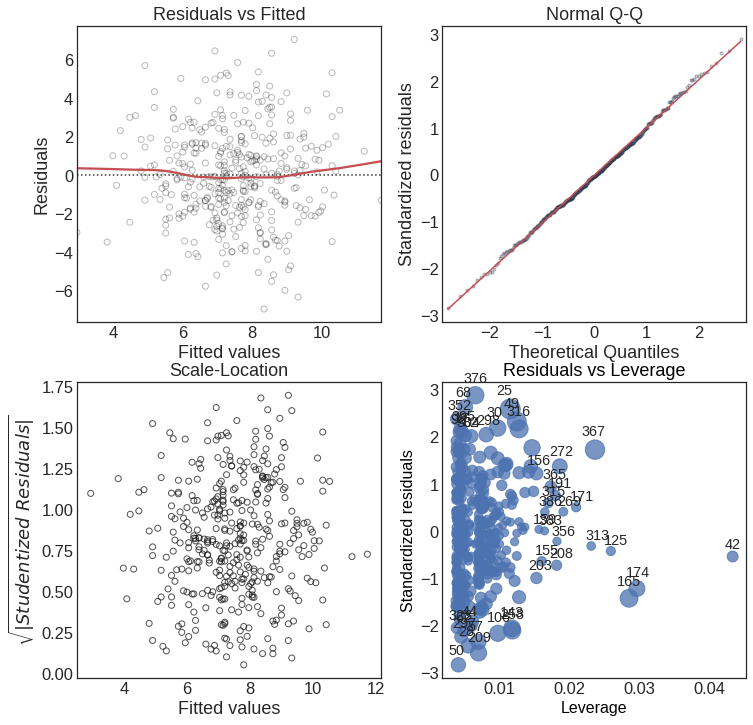

In [84]:
infl = ex10e.get_influence()
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# 1. Residuals. vs. fitted values
ax1 = plt.subplot(221)
sns.residplot(ex10e.fittedvalues, ex10e.resid, lowess=True, ax=ax1, order=1, line_kws={
              'color': 'r'}, scatter_kws={'facecolors': 'None', 'edgecolors': 'k', 'alpha': .3})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# 2. Normal Q-Q plot
ax2 = plt.subplot(222)
smg.qqplot(infl.resid_studentized_external, line='r', ax=ax2,
           alpha=0.3, marker='.', markerfacecolor=None, markeredgecolor='k')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized residuals')

# 3. Square-root absolute standardized residuals vs. fitted values
ax3 = plt.subplot(223)
plt.scatter(ex10e.fittedvalues, np.sqrt(np.absolute(
    infl.resid_studentized_external)), alpha=0.75, facecolors='none', edgecolors='k')
plt.title('Scale-Location')
plt.xlabel('Fitted values')
plt.ylabel(r'$\sqrt{|Studentized\ Residuals|}$')

# 4. Standardized residuals vs. leverage statistics
ax4 = plt.subplot(224)
smg.influence_plot(ex10e, size=20, ax=ax4)
plt.xlabel('Leverage')
plt.ylabel('Standardized residuals')
plt.title('Residuals vs Leverage')
plt.savefig('Diagnostic10e.png')

<b> WORK IN PROGRESS </b>

Some ideas were implemented using as a reference the work of Ning Liu (https://github.com/0liu), specifically the incredibly good implementation of the diagnostic plots for the regressions. You can find their incredible work on their GitHub page. 